In [10]:
pip install pandas_datareader

     |████████████████████████████████| 109 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 11.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
from pandas_datareader import data

In [12]:
goog = data.DataReader('GOOG', start='2004', end='2021',
data_source='yahoo')
print(goog)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2004-08-19    51.835709    47.800831    49.813290    49.982655  44871361.0   
2004-08-20    54.336334    50.062355    50.316402    53.952770  22942874.0   
2004-08-23    56.528118    54.321388    55.168217    54.495735  18342897.0   
2004-08-24    55.591629    51.591621    55.412300    52.239197  15319808.0   
2004-08-25    53.798351    51.746044    52.284027    52.802086   9232276.0   
...                 ...          ...          ...          ...         ...   
2020-12-24  1746.000000  1729.109985  1735.000000  1738.849976    346800.0   
2020-12-28  1790.728027  1746.334961  1751.635010  1776.089966   1393000.0   
2020-12-29  1792.439941  1756.089966  1787.790039  1758.719971   1299400.0   
2020-12-30  1765.094971  1725.599976  1762.010010  1739.520020   1306100.0   
2020-12-31  1758.930054  1735.420044  1735.420044  1751.880005  

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format ='svg'

<AxesSubplot:xlabel='Date'>

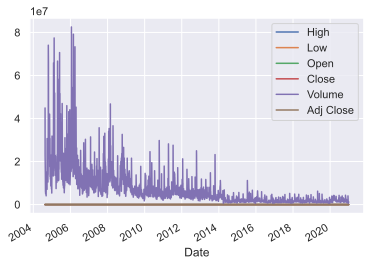

In [14]:
goog.plot()

<AxesSubplot:xlabel='Date'>

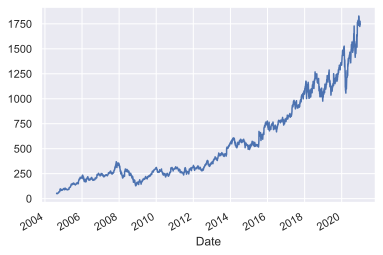

In [15]:
goog= goog['Close']
goog.plot()

In [16]:
goog.resample('Q').mean() # Q = Quater 

Date
2004-09-30      55.211886
2004-12-31      85.182200
2005-03-31      94.299493
2005-06-30     120.979508
2005-09-30     147.513490
                 ...     
2019-12-31    1290.565161
2020-03-31    1356.975803
2020-06-30    1349.559919
2020-09-30    1525.829367
2020-12-31    1687.301720
Freq: Q-DEC, Name: Close, Length: 66, dtype: float64

In [17]:
goog.resample('H').max() # H =hour , max() 일별 최대값 취하기

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

In [18]:
import pandas as pd
print(pd.date_range('2021-11-01',periods=10, freq='M')) # M:Month end
print(pd.date_range('2021-11-01',periods=10, freq='BM')) # BM:BusinessMonth end

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')


In [19]:
print(pd.date_range('2021-11-01',periods=10, freq='BAS')) # BAS = Businessday start

DatetimeIndex(['2022-01-03', '2023-01-02', '2024-01-01', '2025-01-01',
               '2026-01-01', '2027-01-01', '2028-01-03', '2029-01-01',
               '2030-01-01', '2031-01-01'],
              dtype='datetime64[ns]', freq='BAS-JAN')


In [20]:
from pandas.tseries.offsets import DateOffset
ts= pd.Timestamp('2021-10-31 23:28:30')

In [21]:
ts - DateOffset(years = 71, month=6, days=5, hours=19,minutes=28,seconds=30)

Timestamp('1950-06-25 04:00:00')

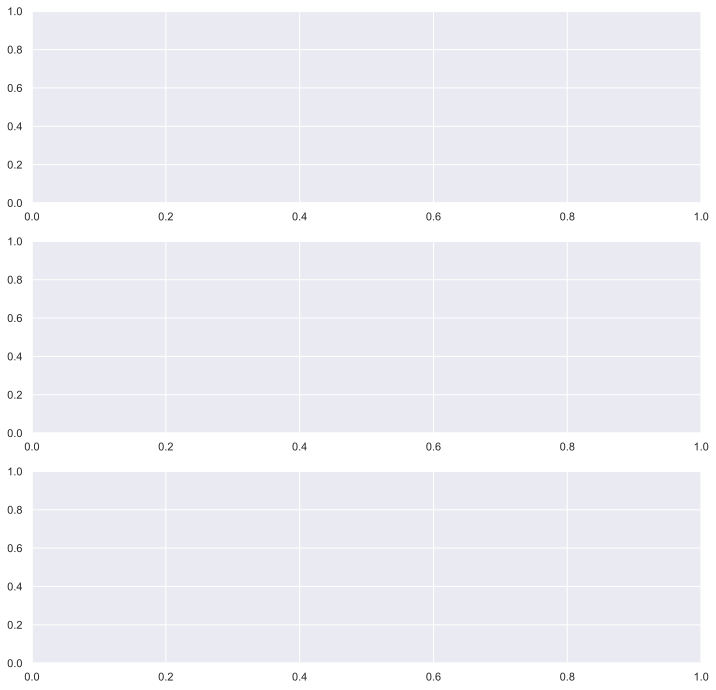

In [22]:
"""
Time Shifts
"""

fig, ax = plt.subplots(3,sharey=True,figsize=(12,12))

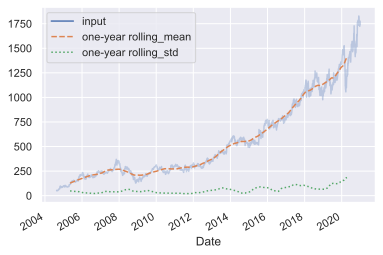

In [23]:
"""
Rolling windows
"""
rolling = goog.rolling(365,center=True)
data=pd.DataFrame({'input':goog,
                   'one-year rolling_mean':rolling.mean(),
                   'one-year rolling_std':rolling.std()})
ax =data.plot(style = ['-','--',':'])
ax.lines[0].set_alpha(0.3)